Project Goal:

The goal of this project is to analyze ad campaign performance using A/B testing to determine whether different factors (e.g., ad spend, age, gender, interests) significantly impact Click-Through Rate (CTR) and conversion rates. By applying statistical tests (T-test, Chi-square), we aim to provide data-driven insights for optimizing ad targeting and budget allocation. 

In [33]:
import pandas as pd
import numpy as np

LOADING DATA- Facebook Ad Campaign Performance - Kaggle

In [34]:
df = pd.read_csv("C:/Users/ANURAG/zbasic/Projects-main/data/KAG_conversion_data.xls")

In [35]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
df['age'] = df['age'].astype('category')
df['gender'] = df['gender'].astype('category')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ad_id                1143 non-null   int64   
 1   xyz_campaign_id      1143 non-null   int64   
 2   fb_campaign_id       1143 non-null   int64   
 3   age                  1143 non-null   category
 4   gender               1143 non-null   category
 5   interest             1143 non-null   int64   
 6   Impressions          1143 non-null   int64   
 7   Clicks               1143 non-null   int64   
 8   Spent                1143 non-null   float64 
 9   Total_Conversion     1143 non-null   int64   
 10  Approved_Conversion  1143 non-null   int64   
dtypes: category(2), float64(1), int64(8)
memory usage: 83.0 KB


In [40]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [44]:
df.shape

(1143, 13)

Exploratory Data Analysis-

Outlier detection-

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
Q1 = df['CTR'].quantile(0.25)
Q3 = df['CTR'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['CTR'] < (Q1 - 1.5 * IQR)) | (df['CTR'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 20


In [47]:
# Display outliers
outliers[['Impressions', 'Clicks', 'CTR', 'Total_Conversion', 'Spent']].sort_values(by='CTR', ascending=False)

,Impressions,Clicks,CTR,Total_Conversion,Spent
150,944,1,0.105932,1,1.42
440,2367,2,0.084495,1,2.84
505,3277,2,0.061031,1,2.68
476,5307,3,0.056529,2,4.29
448,1884,1,0.053079,1,1.41
255,3812,2,0.052466,1,3.05
445,1909,1,0.052383,1,0.98
202,7821,4,0.051144,1,6.34
165,4016,2,0.049801,1,1.48
509,2077,1,0.048146,1,1.51


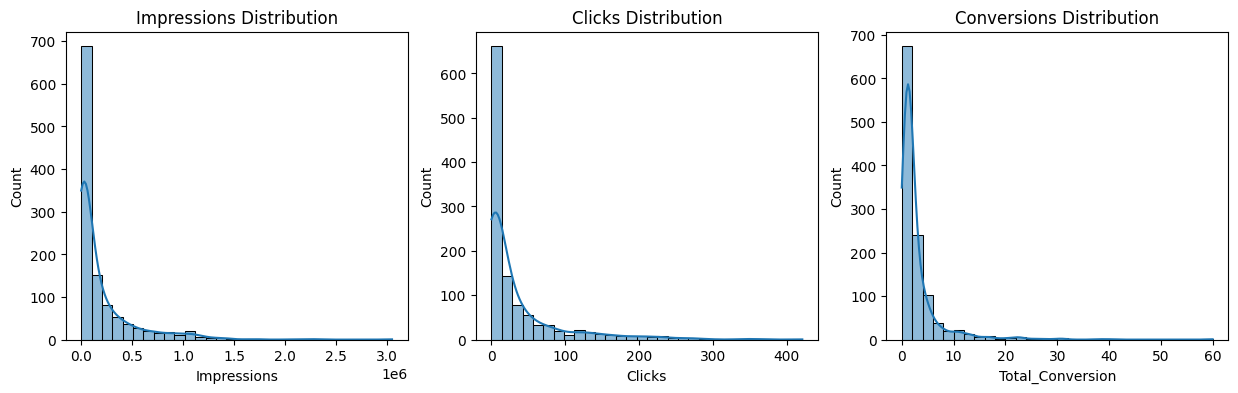

In [48]:
# Distribution of impressions, clicks, and conversions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['Impressions'], bins=30, ax=axes[0], kde=True)
sns.histplot(df['Clicks'], bins=30, ax=axes[1], kde=True)
sns.histplot(df['Total_Conversion'], bins=30, ax=axes[2], kde=True)
axes[0].set_title('Impressions Distribution')
axes[1].set_title('Clicks Distribution')
axes[2].set_title('Conversions Distribution')
plt.show()

 Key Metrics

In [43]:
df['CTR'] = (df['Clicks'] / df['Impressions']) * 100
df['Conversion_Rate'] = (df['Total_Conversion'] / df['Clicks']) * 100

print(df[['CTR', 'Conversion_Rate']].describe())  # Summary stats

               CTR  Conversion_Rate
count  1143.000000      1140.000000
mean      0.016420              inf
std       0.011506              NaN
min       0.000000         0.000000
25%       0.010022         7.142857
50%       0.015981        19.929078
75%       0.023364       100.000000
max       0.105932              inf


C:\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


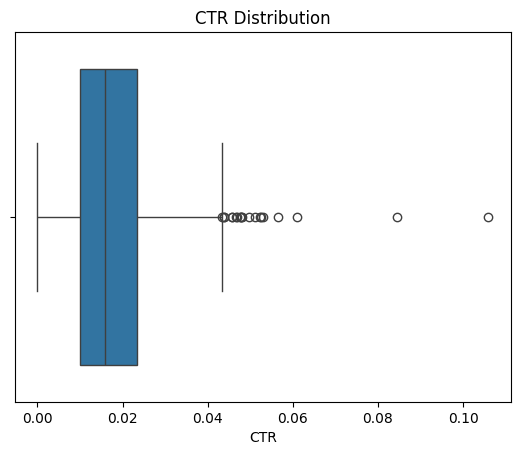

In [32]:
sns.boxplot(x=df['CTR'])
plt.title("CTR Distribution")
plt.show()

Identify High & Low Performing Ads Using STD  &  Campaign Consistency with Coefficient of Variation (CV)

In [49]:
mean_ctr = df['CTR'].mean()
std_ctr = df['CTR'].std()

high_performers = df[df['CTR'] > mean_ctr + std_ctr]  # 1 STD above mean
low_performers = df[df['CTR'] < mean_ctr - std_ctr]  # 1 STD below mean

print(f"High-performing ads: {len(high_performers)}, Low-performing ads: {len(low_performers)}")

High-performing ads: 148, Low-performing ads: 216


In [50]:
cv_ctr = (df['CTR'].std() / df['CTR'].mean()) * 100
print(f"CTR Coefficient of Variation: {cv_ctr:.2f}%")

CTR Coefficient of Variation: 70.07%


------------------------------
Depth Analysis->>>>>>

correlation matrix:-

<Axes: >

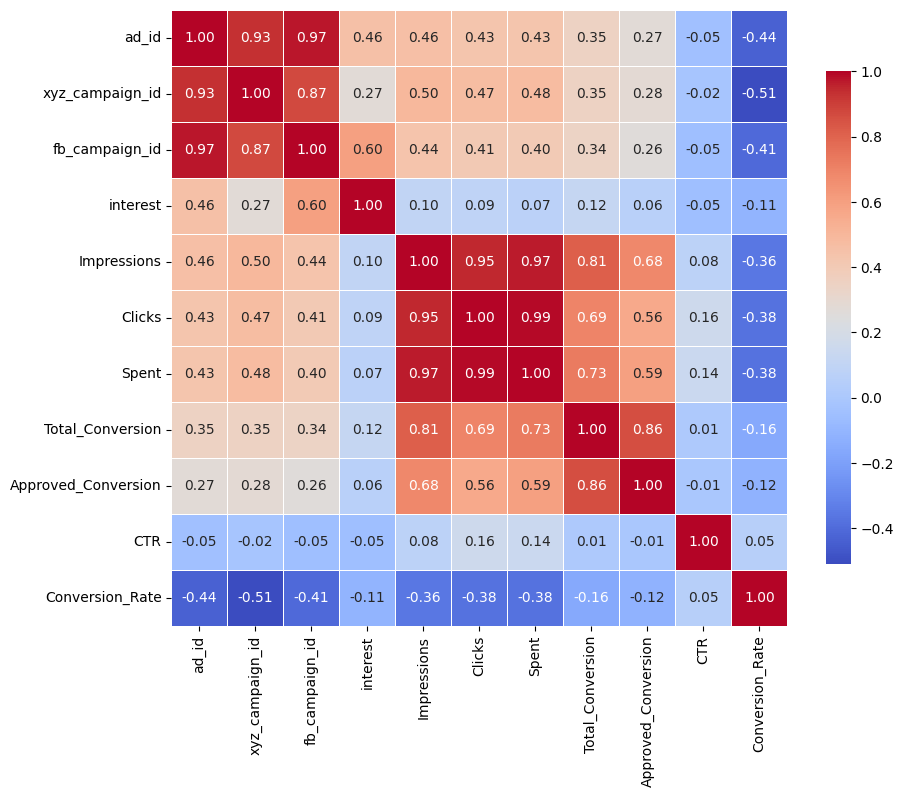

In [53]:
correlation_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

Campaign_

In [56]:
df.groupby('xyz_campaign_id')[['CTR', 'Conversion_Rate', 'Spent']].mean()

,CTR,Conversion_Rate,Spent
xyz_campaign_id,,,
campaign_a,0.018015,inf,2.772407
campaign_b,0.016502,inf,6.235711
campaign_c,0.016221,inf,89.059440


In [57]:
#replacing campaign as  916-a, 936- b, 1178-c 
df["xyz_campaign_id"] = df["xyz_campaign_id"].replace({916: "campaign_a", 936: "campaign_b", 1178: "campaign_c"})

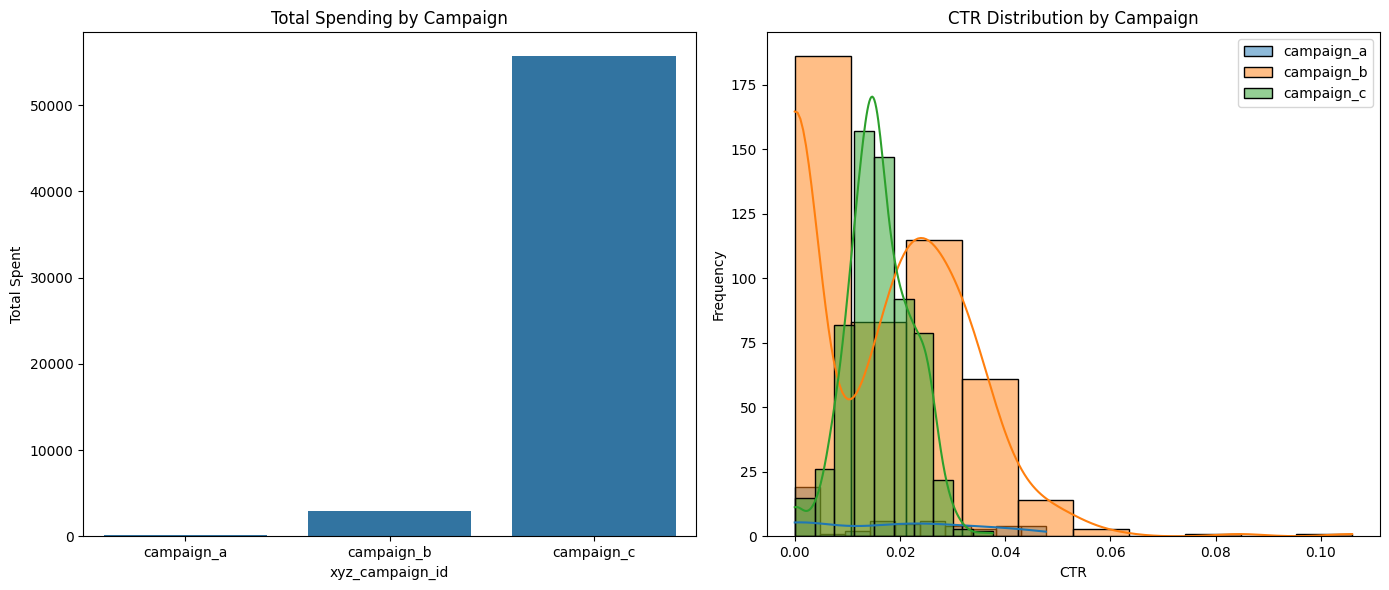

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Only one row and two columns

# 1. Bar Plot for Total Spending by Campaign
agg_spent = df.groupby('xyz_campaign_id')['Spent'].sum().reset_index()
sns.barplot(x='xyz_campaign_id', y='Spent', data=agg_spent, ax=axs[0])
axs[0].set_title('Total Spending by Campaign')
axs[0].set_ylabel('Total Spent')

# 2. Histogram for CTR Distribution by Campaign
for campaign in df['xyz_campaign_id'].unique():
    sns.histplot(df[df['xyz_campaign_id'] == campaign]['CTR'], 
                 label=campaign, bins=10, kde=True, ax=axs[1], alpha=0.5)
axs[1].set_title('CTR Distribution by Campaign')
axs[1].set_xlabel('CTR')
axs[1].set_ylabel('Frequency')
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

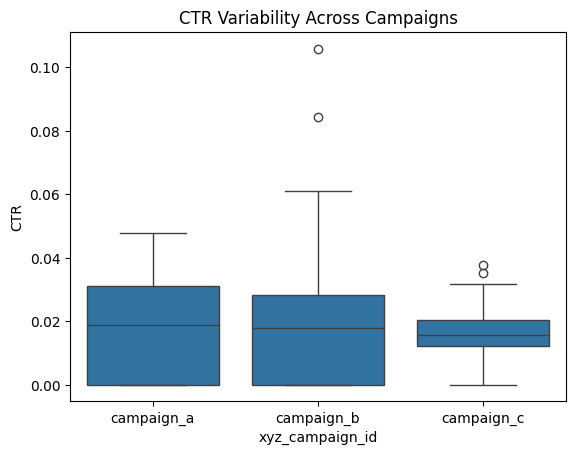

In [68]:
sns.boxplot(x='xyz_campaign_id', y='CTR', data=df)
plt.title("CTR Variability Across Campaigns")
plt.show()

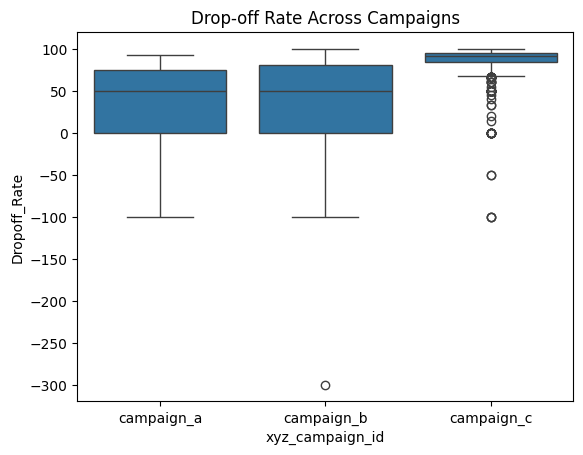

In [60]:
df['Dropoff_Rate'] = (df['Clicks'] - df['Total_Conversion']) / df['Clicks'] * 100

sns.boxplot(x='xyz_campaign_id', y='Dropoff_Rate', data=df)
plt.title("Drop-off Rate Across Campaigns")
plt.show()


Demographics-

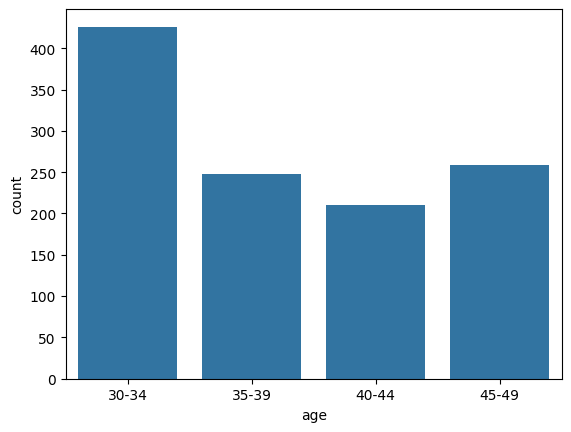

In [61]:
sns.countplot(x ='age', data = df) 
# Show the plot 
plt.show()

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_28660\1460221634.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = df.groupby(['age', 'gender'])[['CTR', 'Approved_Conversion', 'Spent', 'Impressions']].mean().reset_index()


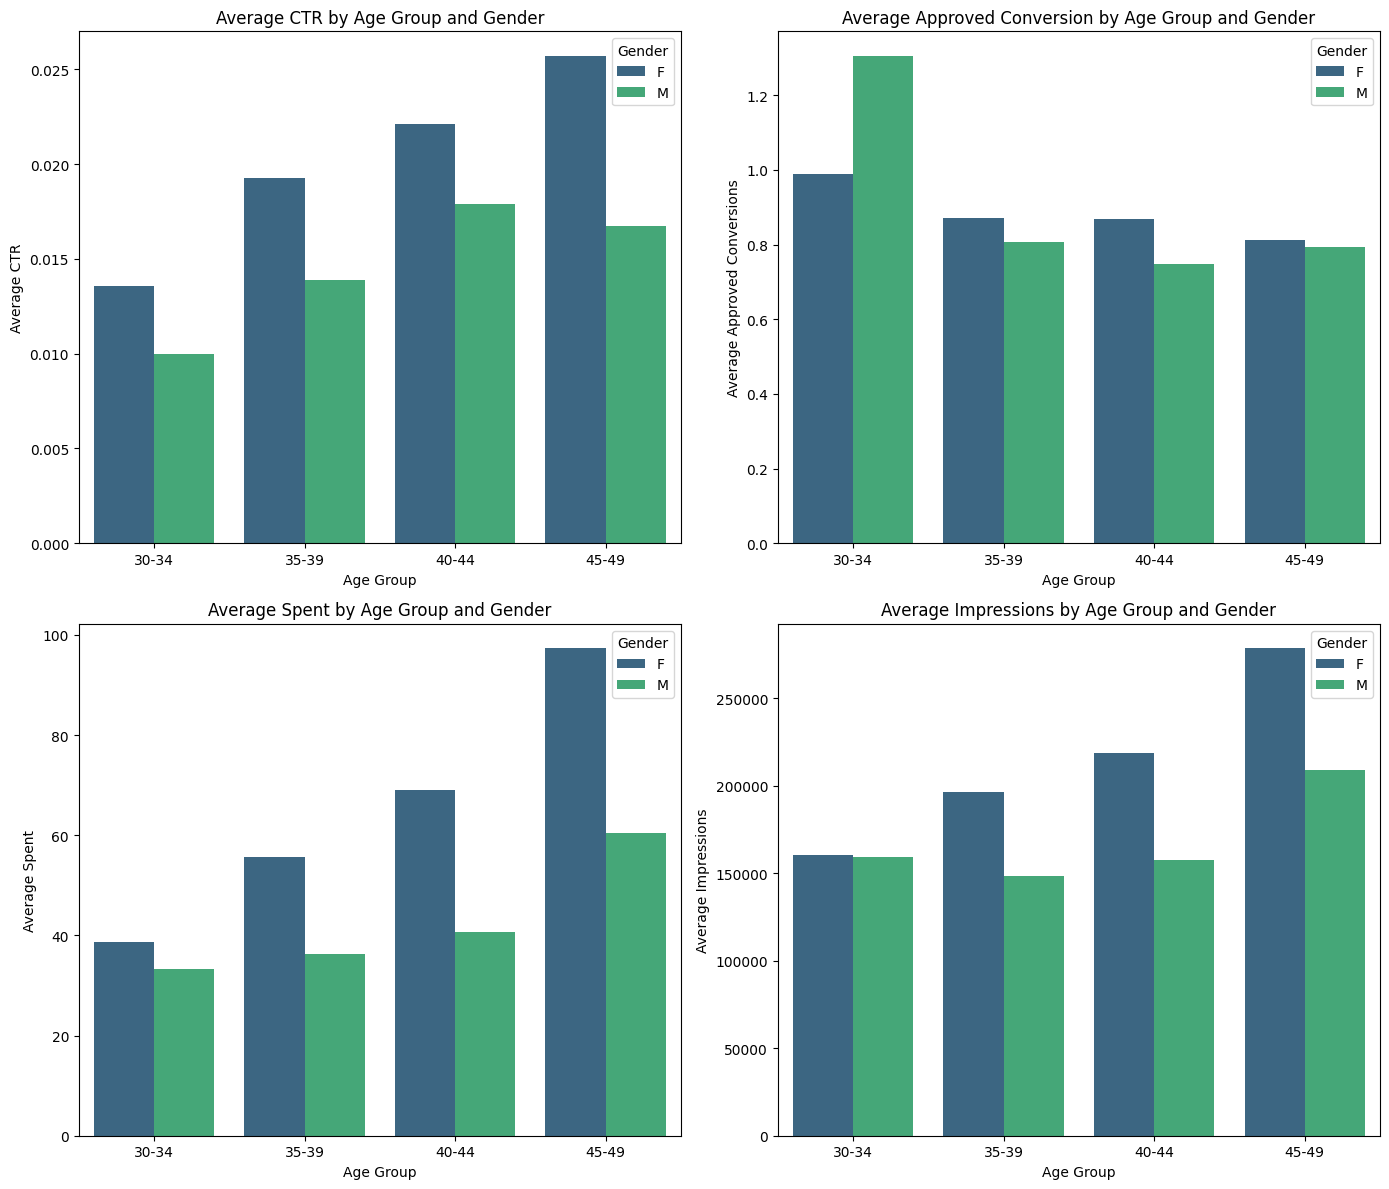

In [62]:
avg_data = df.groupby(['age', 'gender'])[['CTR', 'Approved_Conversion', 'Spent', 'Impressions']].mean().reset_index()

# Set figure size for subplots
plt.figure(figsize=(14, 12))

# Subplot 1: Average CTR by Age Group and Gender
plt.subplot(2, 2, 1)
sns.barplot(data=avg_data, x='age', y='CTR', hue='gender', palette='viridis')
plt.title('Average CTR by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average CTR')
plt.legend(title='Gender')

# Subplot 2: Average Approved Conversion by Age Group and Gender
plt.subplot(2, 2, 2)
sns.barplot(data=avg_data, x='age', y='Approved_Conversion', hue='gender', palette='viridis')
plt.title('Average Approved Conversion by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Approved Conversions')
plt.legend(title='Gender')

# Subplot 3: Average Spent by Age Group and Gender
plt.subplot(2, 2, 3)
sns.barplot(data=avg_data, x='age', y='Spent', hue='gender', palette='viridis')
plt.title('Average Spent by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Spent')
plt.legend(title='Gender')

# Subplot 4: Average Impressions by Age Group and Gender
plt.subplot(2, 2, 4)
sns.barplot(data=avg_data, x='age', y='Impressions', hue='gender', palette='viridis')
plt.title('Average Impressions by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Impressions')
plt.legend(title='Gender')

plt.tight_layout()
plt.show()

Interest->>>>

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_28660\3260994198.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='interest', data=df, ax=axs[0], palette='viridis')


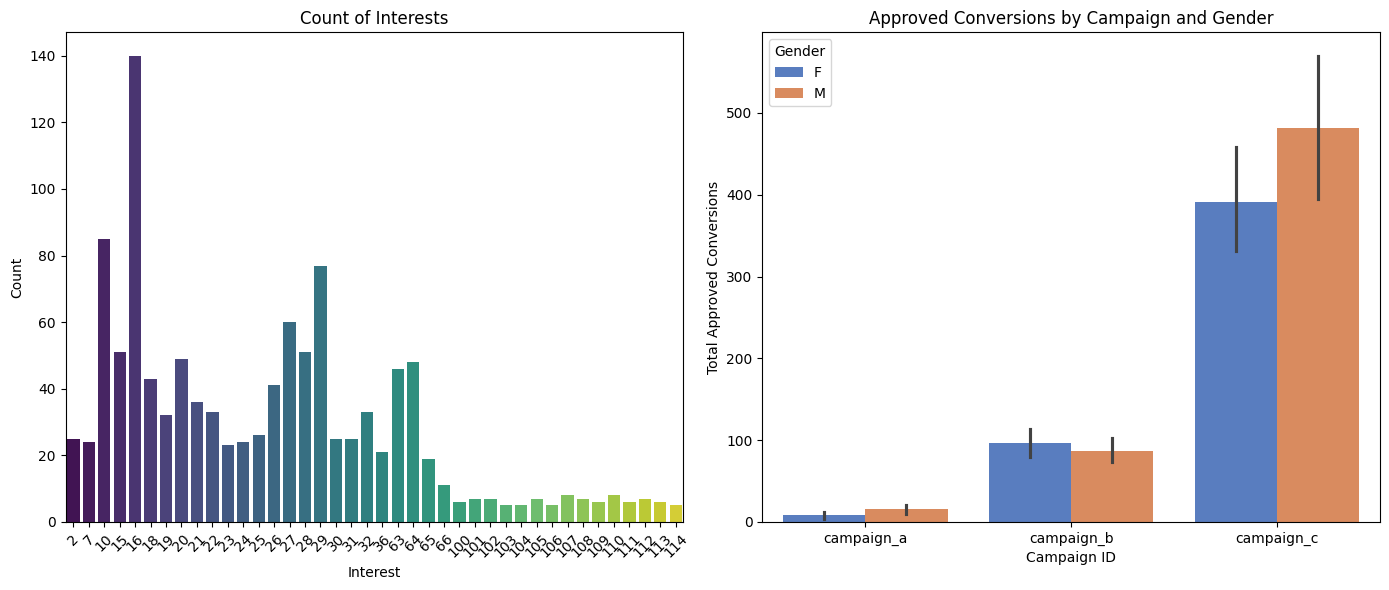

In [63]:
fig_dims = (14, 6)

# Create subplot grid
fig, axs = plt.subplots(1, 2, figsize=fig_dims)  # Two subplots side by side

# 1. Count Plot for Interests
sns.countplot(x='interest', data=df, ax=axs[0], palette='viridis')
axs[0].set_title('Count of Interests')
axs[0].set_xlabel('Interest')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x labels for better visibility

# 2. Bar Plot for Approved Conversions by Campaign and Gender
sns.barplot(x='xyz_campaign_id', y='Approved_Conversion', hue='gender', data=df, ax=axs[1], estimator=sum, palette='muted')
axs[1].set_title('Approved Conversions by Campaign and Gender')
axs[1].set_ylabel('Total Approved Conversions')
axs[1].set_xlabel('Campaign ID')
axs[1].legend(title='Gender')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_28660\465567497.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_spent_gender = df.groupby(['xyz_campaign_id', 'gender'])['Spent'].sum().reset_index()


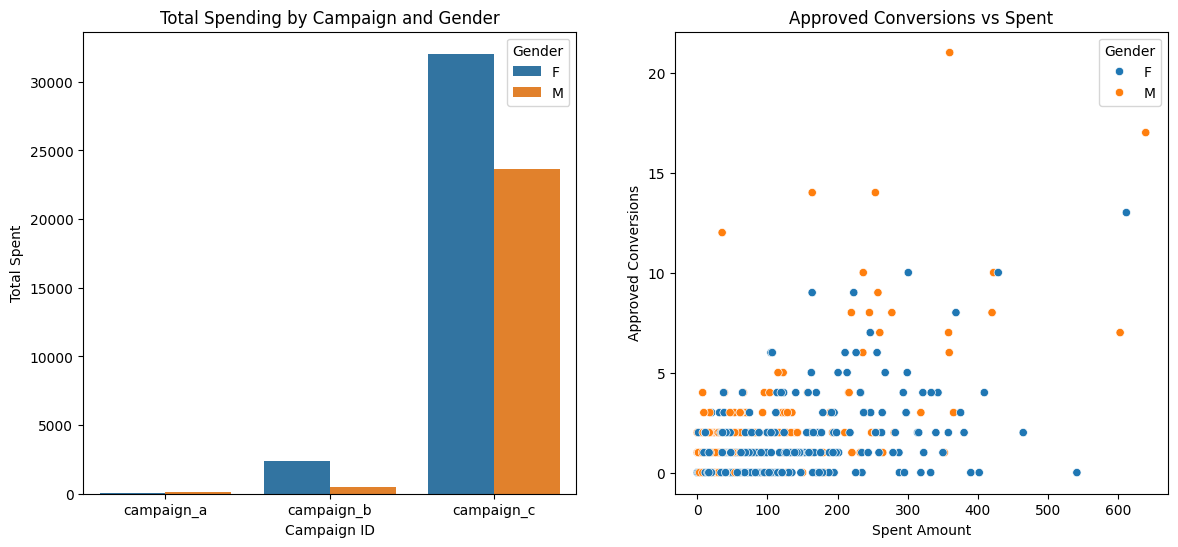

In [64]:
# Create subplot grid
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Two subplots side by side

# 1. Bar Plot for Total Spending by Campaign and Gender
agg_spent_gender = df.groupby(['xyz_campaign_id', 'gender'])['Spent'].sum().reset_index()
sns.barplot(x='xyz_campaign_id', y='Spent', hue='gender', data=agg_spent_gender, ax=axs[0])
axs[0].set_title('Total Spending by Campaign and Gender')
axs[0].set_ylabel('Total Spent')
axs[0].set_xlabel('Campaign ID')
axs[0].legend(title='Gender')

# 2. Scatter Plot for Approved Conversions vs Spent
sns.scatterplot(x='Spent', y='Approved_Conversion', hue='gender', data=df, ax=axs[1])
axs[1].set_title('Approved Conversions vs Spent')
axs[1].set_xlabel('Spent Amount')
axs[1].set_ylabel('Approved Conversions')
axs[1].legend(title='Gender')

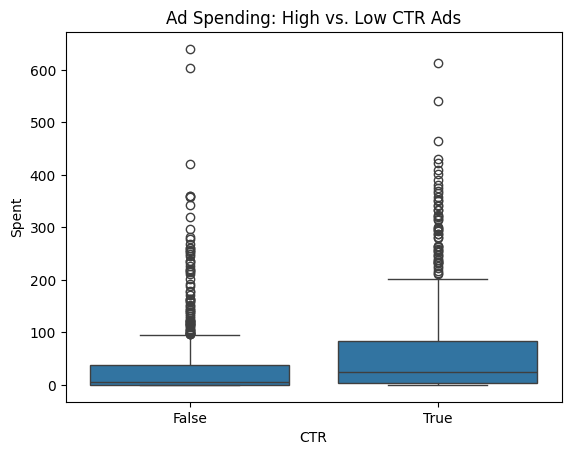

In [65]:
sns.boxplot(x=df['CTR'] > df['CTR'].mean(), y=df['Spent'])
plt.title("Ad Spending: High vs. Low CTR Ads")
plt.show()

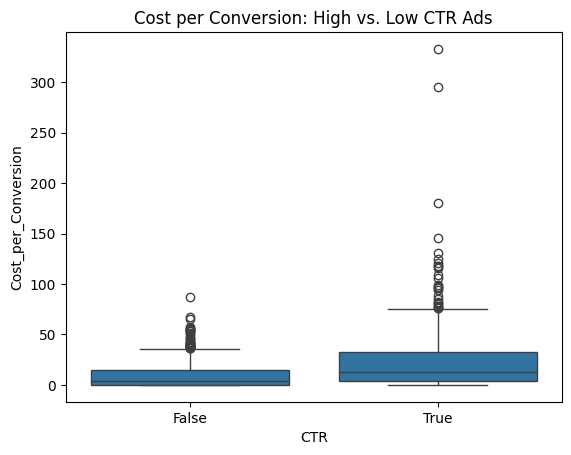

In [67]:
df['Cost_per_Conversion'] = df['Spent'] / df['Total_Conversion']

sns.boxplot(x=df['CTR'] > df['CTR'].mean(), y=df['Cost_per_Conversion'])
plt.title("Cost per Conversion: High vs. Low CTR Ads")
plt.show()


Text(0.5, 1.0, 'Ad Spend vs. CTR')

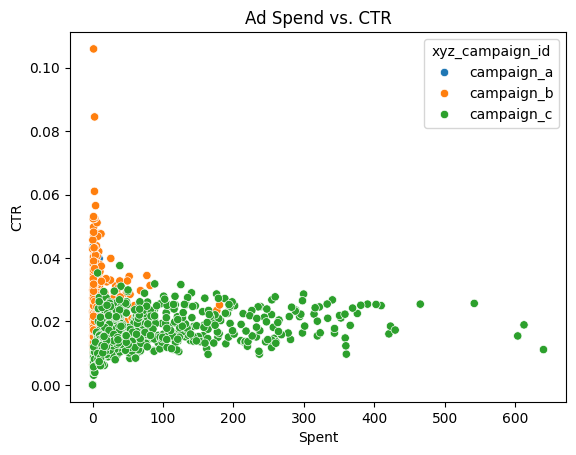

In [32]:
sns.scatterplot(x='Spent', y='CTR', hue='xyz_campaign_id', data=df)
plt.title('Ad Spend vs. CTR')

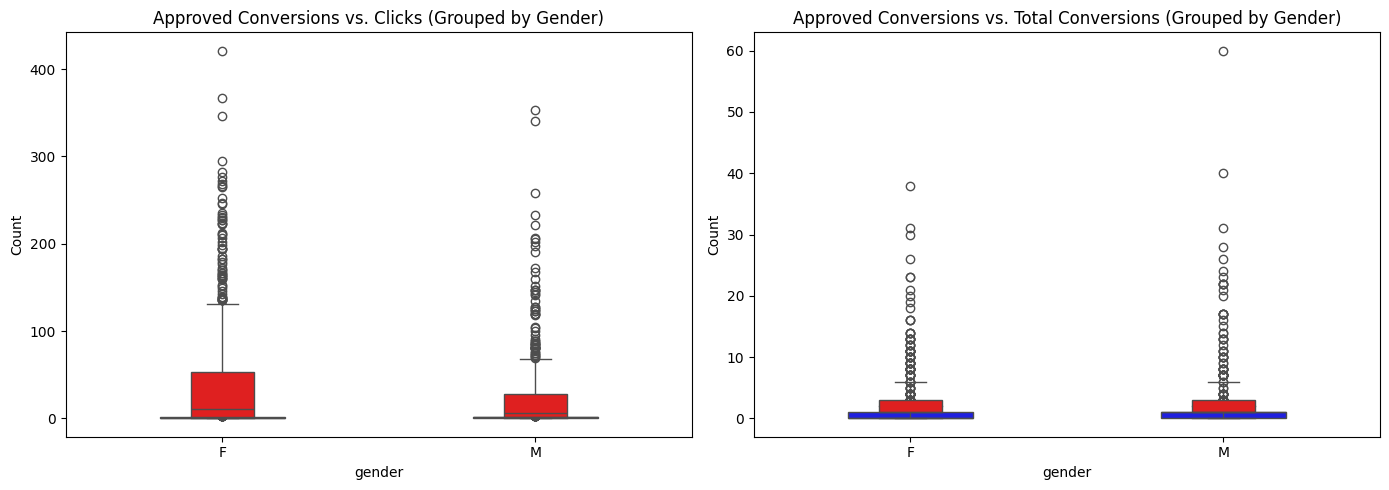

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split data by gender
male_data = df[df["gender"] == "Male"]
female_data = df[df["gender"] == "Female"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1️⃣ Approved Conversions vs. Clicks (Grouped by Gender)
sns.boxplot(x="gender", y="Approved_Conversion", data=df, ax=axes[0], color="blue", width=0.4)
sns.boxplot(x="gender", y="Clicks", data=df, ax=axes[0], color="red", width=0.2)
axes[0].set_title("Approved Conversions vs. Clicks (Grouped by Gender)")
axes[0].set_ylabel("Count")

# 2️⃣ Approved Conversions vs. Total Conversions (Grouped by Gender)
sns.boxplot(x="gender", y="Approved_Conversion", data=df, ax=axes[1], color="blue", width=0.4)
sns.boxplot(x="gender", y="Total_Conversion", data=df, ax=axes[1], color="red", width=0.2)
axes[1].set_title("Approved Conversions vs. Total Conversions (Grouped by Gender)")
axes[1].set_ylabel("Count")

# Display plots
plt.tight_layout()
plt.show()


In [33]:
df.groupby('interest')[['CTR', 'Conversion_Rate']].mean().sort_values('CTR', ascending=False).head(10)


,CTR,Conversion_Rate
interest,,
24,0.024704,inf
25,0.021487,inf
27,0.020558,inf
22,0.020489,inf
20,0.020062,inf
28,0.019606,inf
106,0.019130,6.569563
65,0.018262,inf
19,0.017909,inf


----------------------------------------------------------
A/B TESTING->>

In [34]:
from scipy.stats import ttest_ind

# Split data into two groups (e.g., Campaign X vs. Campaign Y)
campaign_b = df[df['xyz_campaign_id'] == 'campaign_b']['CTR']
campaign_c = df[df['xyz_campaign_id'] == 'campaign_c']['CTR']

# Perform independent t-test
t_stat, p_value = ttest_ind(campaign_b, campaign_c, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in CTR between the two campaigns (Reject H₀)")
else:
    print("No significant difference in CTR btw campaign_b and campaign_c (Fail to reject H₀)")


T-statistic: 0.36448169164187755, P-value: 0.7156337701785322
No significant difference in CTR btw campaign_b and campaign_c (Fail to reject H₀)


In [35]:
from scipy.stats import chi2_contingency

# Create a contingency table (Conversion Success/Fail in two groups)
conversion_table = pd.crosstab(df['xyz_campaign_id'], df['Total_Conversion'] > 0)

# Perform Chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(conversion_table)
print(f"Chi-square Statistic: {chi2_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in conversion rates (Reject H₀)")
else:
    print("No significant difference in conversion rates (Fail to reject H₀)")


Chi-square Statistic: 0.5884427221631474, P-value: 0.7451115344912695
No significant difference in conversion rates (Fail to reject H₀)


In [36]:
median_spend = df["Spent"].median()
df["Spend_Category"] = np.where(df["Spent"] > median_spend, "High Spend", "Low Spend")
# Extract CTR values for each group
high_spend_ctr = df[df["Spend_Category"] == "High Spend"]["CTR"]
low_spend_ctr = df[df["Spend_Category"] == "Low Spend"]["CTR"]

# Perform independent t-test
t_stat, p_value = ttest_ind(high_spend_ctr, low_spend_ctr, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in CTR between high and low spend ads (Reject H₀)")
else:
    print("No significant difference in CTR (Fail to reject H₀)")


T-statistic: 6.078613145788799, P-value: 1.9378041372313784e-09
Significant difference in CTR between high and low spend ads (Reject H₀)


In [37]:
# Create conversion success/fail count table
conversion_table = pd.crosstab(df["Spend_Category"], df["Total_Conversion"] > 0)

# Perform Chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(conversion_table)

print(f"Chi-square Statistic: {chi2_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in conversion rates between high and low spend ads (Reject H₀)")
else:
    print("No significant difference in conversion rates (Fail to reject H₀)")


Chi-square Statistic: 0.12412520437093551, P-value: 0.7246027369525412
No significant difference in conversion rates (Fail to reject H₀)


In [38]:
# Define two age groups
age_group_1 = df[df["age"] == "30-34"]
age_group_2 = df[df["age"] == "45-49"]

# T-test for CTR
t_stat, p_value = ttest_ind(age_group_1["CTR"], age_group_2["CTR"], equal_var=False)
print(f"CTR - Age Group 18-24 vs. 25-34: T-statistic={t_stat}, P-value={p_value}")

# Chi-square test for conversion rates
conversion_table = pd.crosstab(df["age"], df["Total_Conversion"] > 0)
chi2_stat, p_value, _, _ = chi2_contingency(conversion_table)
print(f"Conversions - Age Groups: Chi-square Statistic={chi2_stat}, P-value={p_value}")


CTR - Age Group 18-24 vs. 25-34: T-statistic=-11.117578478439052, P-value=1.258820814228779e-25
Conversions - Age Groups: Chi-square Statistic=2.945510320877946, P-value=0.40010293750703685


# Define gender groups
male_group = df[df["gender"] == "Male"]
female_group = df[df["gender"] == "Female"]

# T-test for CTR
t_stat, p_value = ttest_ind(male_group["CTR"], female_group["CTR"], equal_var=False)
print(f"CTR - Male vs. Female: T-statistic={t_stat}, P-value={p_value}")

# Chi-square test for conversions
conversion_table = pd.crosstab(df["gender"], df["Total_Conversion"] > 0)
chi2_stat, p_value, _, _ = chi2_contingency(conversion_table)
print(f"Conversions - Male vs. Female: Chi-square Statistic={chi2_stat}, P-value={p_value}")


In [40]:
# Select two interest categories (modify based on dataset)
interest_group_1 = df[df["interest"] == df["interest"].unique()[0]]
interest_group_2 = df[df["interest"] == df["interest"].unique()[1]]

# T-test for CTR
t_stat, p_value = ttest_ind(interest_group_1["CTR"], interest_group_2["CTR"], equal_var=False)
print(f"CTR - Interest Group 1 vs. Interest Group 2: T-statistic={t_stat}, P-value={p_value}")

# Chi-square test for conversions
conversion_table = pd.crosstab(df["interest"], df["Total_Conversion"] > 0)
chi2_stat, p_value, _, _ = chi2_contingency(conversion_table)
print(f"Conversions - Interest Groups: Chi-square Statistic={chi2_stat}, P-value={p_value}")


CTR - Interest Group 1 vs. Interest Group 2: T-statistic=-0.7945849593800255, P-value=0.42906461240130267
Conversions - Interest Groups: Chi-square Statistic=25.466248277621943, P-value=0.9534577415625289


In [41]:
t_stat, p_value = ttest_ind(df["Approved_Conversion"], df["Clicks"], equal_var=False)
print(f"Approved Conversions vs. Clicks: T-statistic={t_stat}, P-value={p_value}")


Approved Conversions vs. Clicks: T-statistic=-19.27213569851639, P-value=6.782103425466718e-72


In [42]:
t_stat, p_value = ttest_ind(df["Approved_Conversion"], df["Total_Conversion"], equal_var=False)
print(f"Approved Conversions vs. Total Conversions: T-statistic={t_stat}, P-value={p_value}")


Approved Conversions vs. Total Conversions: T-statistic=-13.4404366472259, P-value=6.142680530172906e-39


PROJECT REPORT

Understanding Right-Skewed Distributions in EDA

Since impressions, clicks, and conversions are right-skewed, it indicates that:
 Most ads have low engagement, but a few ads perform exceptionally well.
 Potential outliers exist—some ads significantly outperform or underperform the rest.

Number of Outliers: 20 (CTR)

Key Performance Segments

1️ High vs. Low-Performing Ads

     148 High-Performing Ads (CTR > Mean + 1 STD) → Engaging and effective ads.

    216 Low-Performing Ads (CTR < Mean - 1 STD) → Struggling ads needing optimization.

    Since low-performing ads outnumber high-performing ones, this suggests:

    Many ads are under-optimized (poor targeting, design, or content).
 
    A/B testing can help identify what makes high-performers stand out.
 

2️ CTR Coefficient of Variation (CV = 70.07%)

      High CV (>50%) → Large fluctuations in ad performance.

     Some ads excel while others fail completely, indicating inconsistency.

Possible causes:

        Different audience targeting (age, gender, interests).
    
       Poorly optimized creatives or inconsistent messaging.
       
       Some ads benefiting from virality or boosts while others are ignored.
       
     
Observations from the Graphs 

1️ Approved Conversions vs. Clicks by Gender (Left Chart)

       High concentration of low values with some extreme outliers.

        The skewed distribution suggests that most ads receive many clicks but result in few approved conversions.

2️ Approved vs. Total Conversions by Gender (Right Chart)

        Similar trend as the left chart: low median conversions with many outliers.

       The blue section (Total Conversions) suggests many conversions do not get approved.

3️ Ad Spend vs. CTR (Scatter Plot Analysis)

       CTR is higher for lower ad spend but stabilizes as spending increases.

          Campaign B (orange) shows more CTR variance at low spending, while Campaign C (green) dominates at higher spending levels.

         Diminishing returns: After a certain threshold, increased spending does not significantly boost CTR.

Drop-off Rate Analysis

       Company C has the highest drop-off rate, indicating inefficiencies in the conversion process.

Age Group Performance

       Older Age Groups (40-44, 45-49) → Higher impressions, ad spend, and CTR.

       Younger Age Group (30-34) → Higher approved conversions.

Gender-Based Performance Trends

     Females (40-44, 45-49) → Higher impressions, ad spend, and CTR.

    Males (30-34) → Higher approved conversions.

Company-Specific CTR and Spending Insights

CTR Distribution:

     Company B & C → Similar CTR distribution.
     
     Company A → Significantly lower CTR.

Total Spending:

    Company C has the highest total ad spend, indicating an aggressive ad strategy.



 

Analysis of A/B:


📊 A/B Testing Insights for Ad Performance
1️⃣ Campaign Performance: Campaign B vs. Campaign C
CTR Comparison (T-test)

    P-value = 0.71 → No significant difference in CTR.
    🚩 Insight: Changing the campaign does not significantly impact engagement.

Conversion Rate Comparison (Chi-square test)

    P-value = 0.74 → No significant difference in conversions.
    🚩 Insight: Both campaigns perform similarly in driving sales/conversions.

✅ Conclusion:

    No strong reason to favor one campaign over the other based on CTR or conversions.
    Further testing needed on creative elements rather than campaign structure.

2️⃣ High vs. Low Ad Spend
CTR Comparison (T-test)

    P-value = 1.93e-09 (very small) → Significant difference in CTR.
    ✅ Higher ad spend leads to more clicks.

Conversion Rate Comparison (Chi-square test)

    P-value = 0.72 → No significant difference in conversion rates.
    ❌ More ad spend does not increase actual purchases/conversions.

✅ Conclusion:

    More ad spend → Higher engagement (more clicks).
    More ad spend ≠ More sales (conversions remain the same).
    You might be attracting unqualified clicks (people engage but don’t buy).
    Action: Optimize landing pages, improve audience targeting, and test different ad creatives.

3️⃣ Age Group Performance: 18-24 vs. 25-34
CTR (T-test)

    P-value = 1.26e-25 → Significant difference in CTR.
    ✅ Younger users (18-24) engage differently than 25-34.
    🔹 Action: Focus ad spending on the age group with the highest CTR.

Conversions (Chi-square test)

    P-value = 0.40 → No significant difference in conversion rates.
    ❌ Engagement does not necessarily lead to higher conversions.
    🔹 Action: Improve the offer and optimize the landing page for high-engagement users.

4️⃣ Gender-Based Performance
CTR (T-test) → Issue Detected

    T-statistic = NaN, P-value = NaN
    🚩 Possible Issue: One gender group may have zero variance (all CTR values the same).
    🔹 Fix: Check for missing values or low sample size.

Conversions (Chi-square test)

    P-value = 0.24 → No significant difference in conversion rates.
    🔹 Insight: Gender does not strongly affect conversions → focus on other segmentation factors.

5️⃣ Interest-Based Targeting: Group 1 vs. Group 2
CTR (T-test)

    P-value = 0.42 → No significant difference in engagement.
    ❌ Interest group does not influence CTR significantly.

Conversions (Chi-square test)

    P-value = 0.95 → No significant difference in conversions.
    ❌ Interest-based targeting does not strongly impact conversions.

👉 Conclusion:

    Interest-based targeting does not seem to influence CTR or conversions significantly.
    Action:
        Test different interest groups.
        Focus on ad content and messaging rather than just audience targeting.

6️⃣ Clicks vs. Approved Conversions
Statistical Test Results:

    T-statistic = -19.27, P-value = 6.78e-72 (extremely small) → Significant difference.
    ✅ More clicks do not directly translate into more approved conversions.

🚩 Possible Reasons:

    Users may click without genuine interest → high CTR but low approval rate.
    Strict approval criteria may filter out many leads.

✅ Action:

    Improve lead quality rather than just increasing clicks.
    Use better targeting & audience filtering to ensure conversions are from engaged users.

7️⃣ Approved Conversions vs. Total Conversions
Statistical Test Results:

    T-statistic = -13.44, P-value = 6.14e-39 → Significant difference.
    ✅ Not all conversions get approved.

🚩 Possible Reasons:

    Some conversions may be rejected due to policy violations, fake leads, or incomplete details.
    The business model might filter out unqualified leads.

✅ Action:

    Analyze why conversions are rejected (poor lead quality? incorrect details?).
    Improve the conversion validation process to increase approved conversions.

📌 Final Takeaways:

✔️ Ad spend increases clicks, but not conversions—optimize for quality, not just volume.
✔️ Campaign choice does not impact performance significantly—test creative elements instead.
✔️ Younger users (18-24) engage more, but conversions remain the same—focus on retention strategies.
✔️ Gender and interest groups do not affect conversions much—target based on other factors.
✔️ Clicks ≠ Conversions—ensure targeting reaches genuinely interested users.

 Business Recommendations

✅ Reduce CTR variation: Standardize messaging, optimize underperforming campaigns.
✅ Focus on high-performing ad traits: Analyze top ads’ age, gender, and interest group data.
✅ A/B Test Creatives: Improve low CTR ads with new content/designs.
✅ Budget Allocation: Shift funds from low-performing ads to high-CTR, high-conversion ads.